# `Multiple Linear Regression and Gradient Descent on a Dataset`

----

## `Multiple Linear Regression`

### `example `:

In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math 

import statsmodels.api as sm

In [124]:
dataset = pd.read_csv("CrudeOilOutput.csv")
dataset.head()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,55.7,74.3,13.4,83.5,598.6,21.7
1,55.7,72.5,13.6,114.0,610.0,20.7
2,52.8,70.5,14.0,172.5,654.6,19.2
3,57.3,74.4,13.8,191.1,684.9,19.1
4,59.7,76.3,14.1,250.9,697.2,19.2


In [125]:
dataset.corr()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
WorldOil,1.000000,0.923252,0.585232,0.670815,0.623787,0.214418
USEnergy,0.923252,1.000000,0.790683,0.855757,0.791121,0.057034
USAutoFuelRate,0.585232,0.790683,1.000000,0.972109,0.967919,-0.422824
USNuclear,0.670815,0.855757,0.972109,1.000000,0.952128,-0.404187
USCoal,0.623787,0.791121,0.967919,0.952128,1.000000,-0.448483
USDryGas,0.214418,0.057034,-0.422824,-0.404187,-0.448483,1.000000


### `We assume a cutoff of 0.5 to be the deciding factor whether correlation is good or bad`

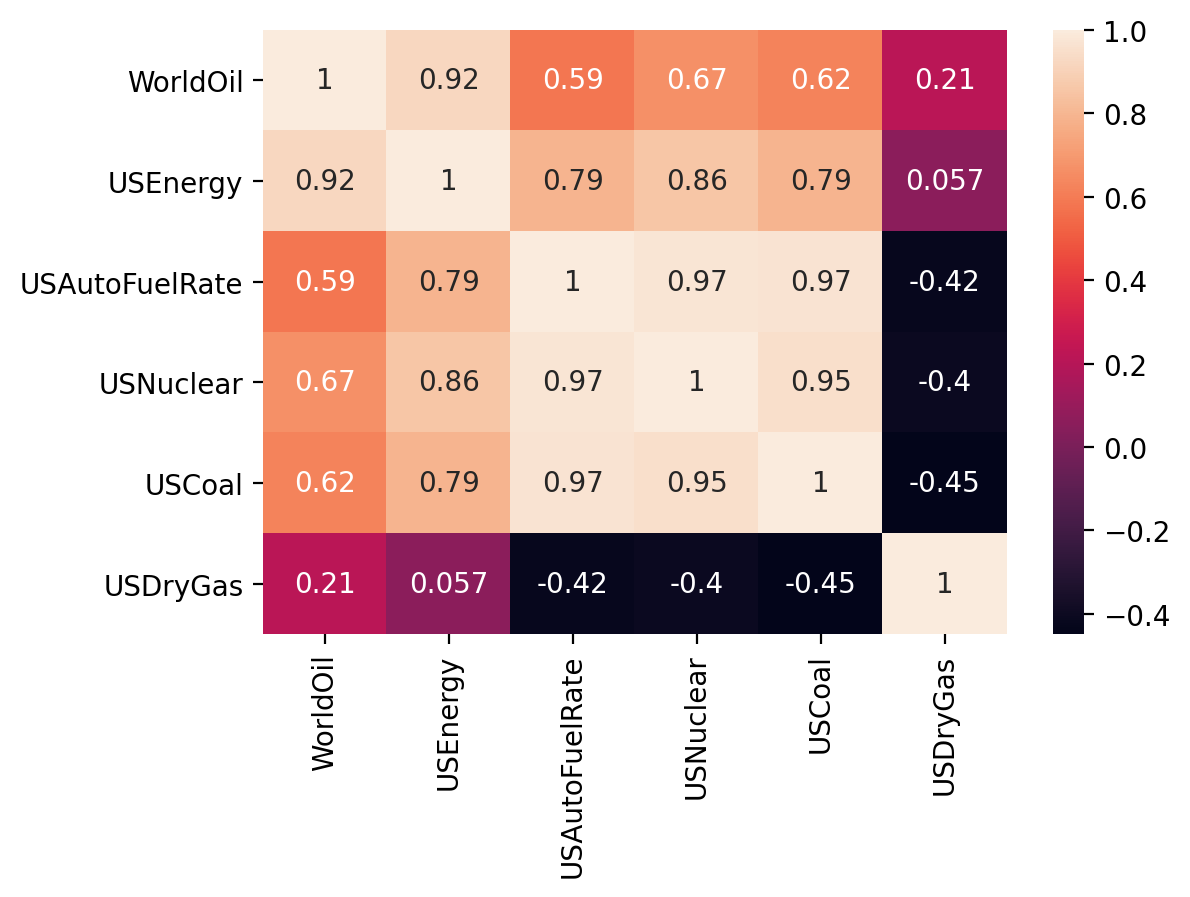

In [126]:
plt.figure(dpi=200)
sns.heatmap(dataset.corr(),annot=True)
plt.show()

### `We can also change the color assent for better visualization`

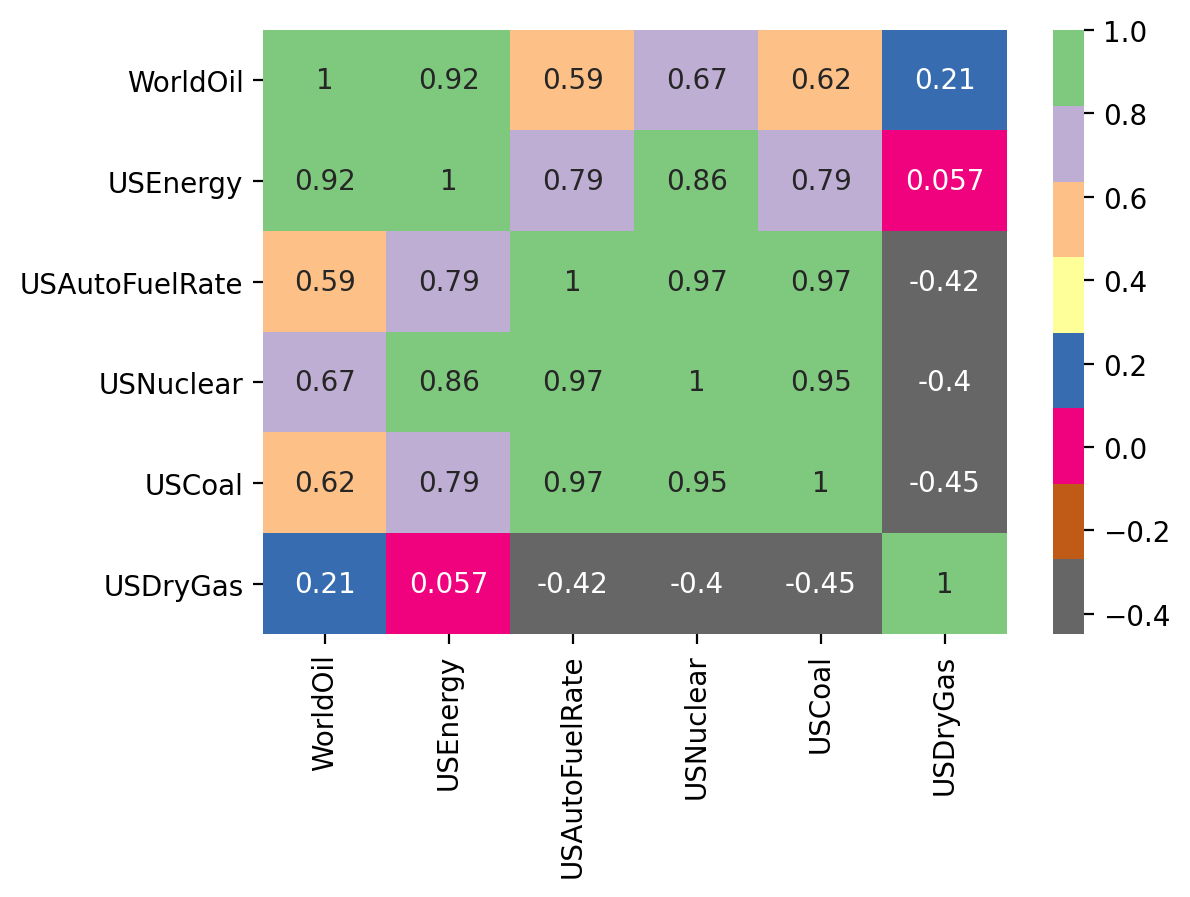

In [127]:
plt.figure(dpi=200)
sns.heatmap(dataset.corr(),annot=True,cmap="Accent_r")
plt.show()

### `But we cannot fully rely on numbers, it can be due to outliers`

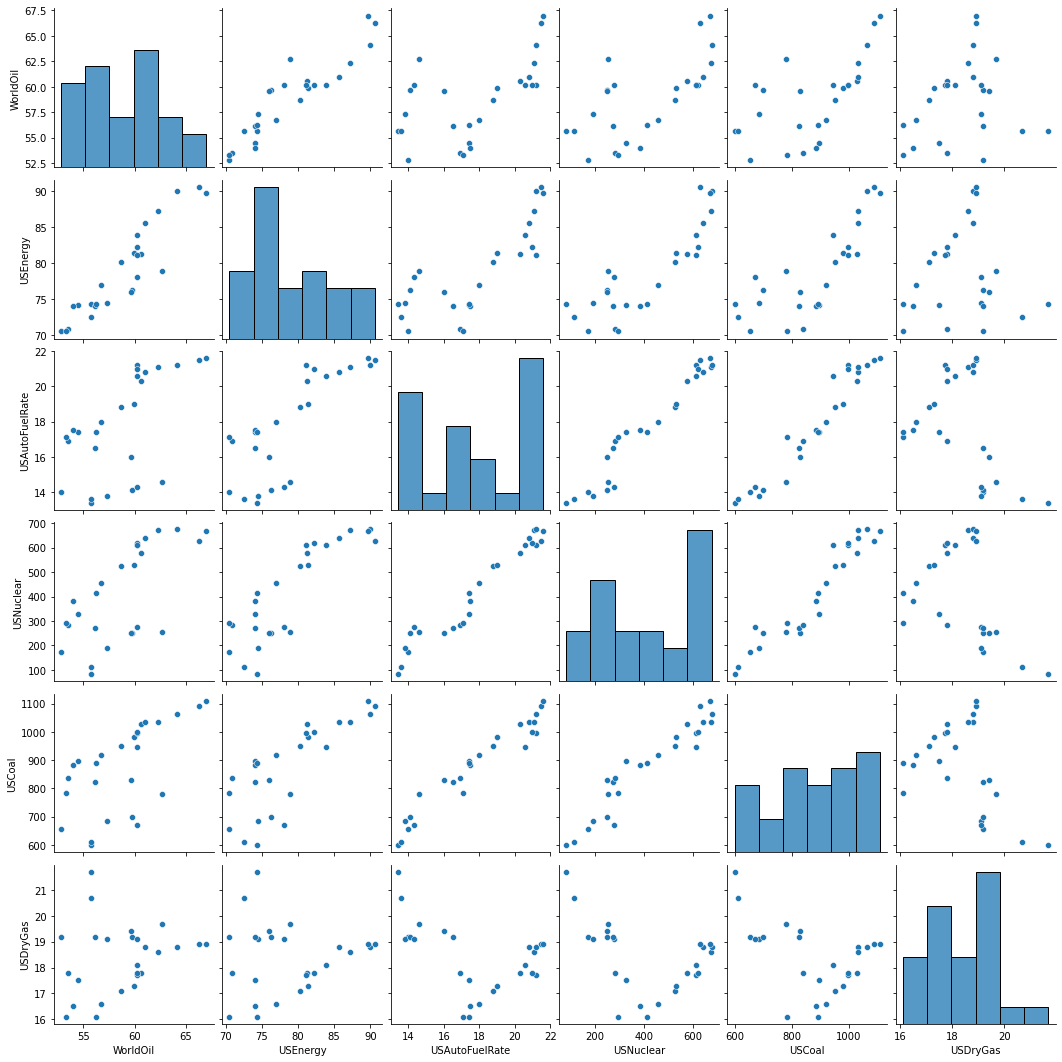

In [128]:
sns.pairplot(dataset)
plt.show()

In [129]:
X= dataset.drop("WorldOil",axis=1)
y = dataset["WorldOil"]

In [130]:
X = sm.add_constant(X)
X

,const,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,1.0,74.3,13.4,83.5,598.6,21.7
1,1.0,72.5,13.6,114.0,610.0,20.7
2,1.0,70.5,14.0,172.5,654.6,19.2
3,1.0,74.4,13.8,191.1,684.9,19.1
4,1.0,76.3,14.1,250.9,697.2,19.2
5,1.0,78.1,14.3,276.4,670.2,19.1
6,1.0,78.9,14.6,255.2,781.1,19.7
7,1.0,76.0,16.0,251.1,829.7,19.4
8,1.0,74.0,16.5,272.7,823.8,19.2
9,1.0,70.8,16.9,282.8,838.1,17.8


In [131]:
ols_model = sm.OLS(y,X)
ols_model = ols_model.fit()

In [132]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.62
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.41e-10
Time:                        12:49:59   Log-Likelihood:                -38.539
No. Observations:                  26   AIC:                             89.08
Df Residuals:                      20   BIC:                             96.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7085      8.909      0.304      0.764     -15.875      21.292
USEnergy           0.8357      0.180      4.637      0.000       0.460       1.212
USAutoFuelRate    -0.7341      0.549     -1.338      0.196      -1.879       0.411
USNuclear         -0.0065      0.010     -0.664      0.514      -0.027       0.014
USCoal             0.0098      0.007      1.348      0.193      -0.005       0.025
USDryGas          -0.1432      0.448     -0.319      0.753      -1.079       0.792
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.450
Skew:                           0.104   Prob(JB):                        0.484
Kurtosis:                       1.862   Cond. No.                     3.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **All the variable which we saw are linearly increasing but we saw, we are getting negative coef in some variable in summary, this might be due to multicollinearity coming into picture**

#### `same thing as above but with different function strategy`

In [133]:
import statsmodels.formula.api as smf

In [134]:
modelols = smf.ols(formula = 'WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas', data = dataset).fit()

In [135]:
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.62
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.41e-10
Time:                        12:50:00   Log-Likelihood:                -38.539
No. Observations:                  26   AIC:                             89.08
Df Residuals:                      20   BIC:                             96.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7085      8.909      0.304      0.764     -15.875      21.292
USEnergy           0.8357      0.180      4.637      0.000       0.460       1.212
USAutoFuelRate    -0.7341      0.549     -1.338      0.196      -1.879       0.411
USNuclear         -0.0065      0.010     -0.664      0.514      -0.027       0.014
USCoal             0.0098      0.007      1.348      0.193      -0.005       0.025
USDryGas          -0.1432      0.448     -0.319      0.753      -1.079       0.792
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.450
Skew:                           0.104   Prob(JB):                        0.484
Kurtosis:                       1.862   Cond. No.                     3.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### `To check multicollinearity we have to check via VIF ( Variance Inflatio Factor )`

### ` If variance is greater then 5, it's severe `

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [137]:
vif_array = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
pd.Series(vif_array,index=X.columns)

const             1398.512639
USEnergy            20.822780
USAutoFuelRate      42.494049
USNuclear           61.549771
USCoal              21.346305
USDryGas             6.188241
dtype: float64

### US Nuclear has high VIF, coef is negative : remove it and check

In [138]:
modelols = smf.ols(formula = 'WorldOil~USEnergy+USAutoFuelRate+USCoal+USDryGas', data = dataset).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     59.75
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           3.58e-11
Time:                        12:50:00   Log-Likelihood:                -38.822
No. Observations:                  26   AIC:                             87.64
Df Residuals:                      21   BIC:                             93.94
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.7608      4.574      1.697      0.105      -1.751      17.273
USEnergy           0.7361      0.099      7.461      0.000       0.531       0.941
USAutoFuelRate    -1.0194      0.337     -3.024      0.006      -1.720      -0.318
USCoal             0.0112      0.007      1.617      0.121      -0.003       0.026
USDryGas           0.0729      0.304      0.239      0.813      -0.560       0.706
==============================================================================
Omnibus:                        5.106   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                1.711
Skew:                           0.088   Prob(JB):                        0.425
Kurtosis:                       1.756   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### US Auto Fuel has high VIF, coef is negative : remove it and check

In [139]:
modelols = smf.ols(formula = 'WorldOil~USEnergy+USCoal+USDryGas', data = dataset).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     55.92
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.86e-10
Time:                        12:50:00   Log-Likelihood:                -43.521
No. Observations:                  26   AIC:                             95.04
Df Residuals:                      22   BIC:                             100.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5181      5.332      1.222      0.234      -4.540      17.576
USEnergy       0.6795      0.113      5.993      0.000       0.444       0.915
USCoal        -0.0051      0.005     -1.014      0.322      -0.016       0.005
USDryGas       0.1751      0.354      0.494      0.626      -0.559       0.910
==============================================================================
Omnibus:                        1.224   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.997
Skew:                           0.455   Prob(JB):                        0.607
Kurtosis:                       2.696   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### US Coal has high VIF, coef is negative : remove it and check

In [140]:
modelols = smf.ols(formula = 'WorldOil~USEnergy+USDryGas', data = dataset).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     83.26
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.93e-11
Time:                        12:50:00   Log-Likelihood:                -44.115
No. Observations:                  26   AIC:                             94.23
Df Residuals:                      23   BIC:                             98.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9827      5.116      0.974      0.340      -5.600      15.566
USEnergy       0.5743      0.046     12.562      0.000       0.480       0.669
USDryGas       0.4654      0.209      2.231      0.036       0.034       0.897
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.119
Skew:                           0.468   Prob(JB):                        0.571
Kurtosis:                       2.604   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### But now as we can see intercept is not contributing to model but our USDryGas start contributing which was not contribution before as we saw in correlation matrix and plots, It's suspicious as it have a IVF greater then 5, remove USDryGas and check

In [141]:
modelols = smf.ols(formula = 'WorldOil~USEnergy', data = dataset).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorldOil   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.86e-11
Time:                        12:50:00   Log-Likelihood:                -46.661
No. Observations:                  26   AIC:                             97.32
Df Residuals:                      24   BIC:                             99.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0749      3.894      3.357      0.003       5.037      21.113
USEnergy       0.5801      0.049     11.773      0.000       0.478       0.682
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.314
Skew:                           0.874   Prob(JB):                        0.191
Kurtosis:                       3.067   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now it's perfect, after removing all multicollinearity intercept become contributing

In [142]:
# ! pip install lmdiag

<module 'matplotlib.pyplot' from 'C:\\Users\\manuj\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

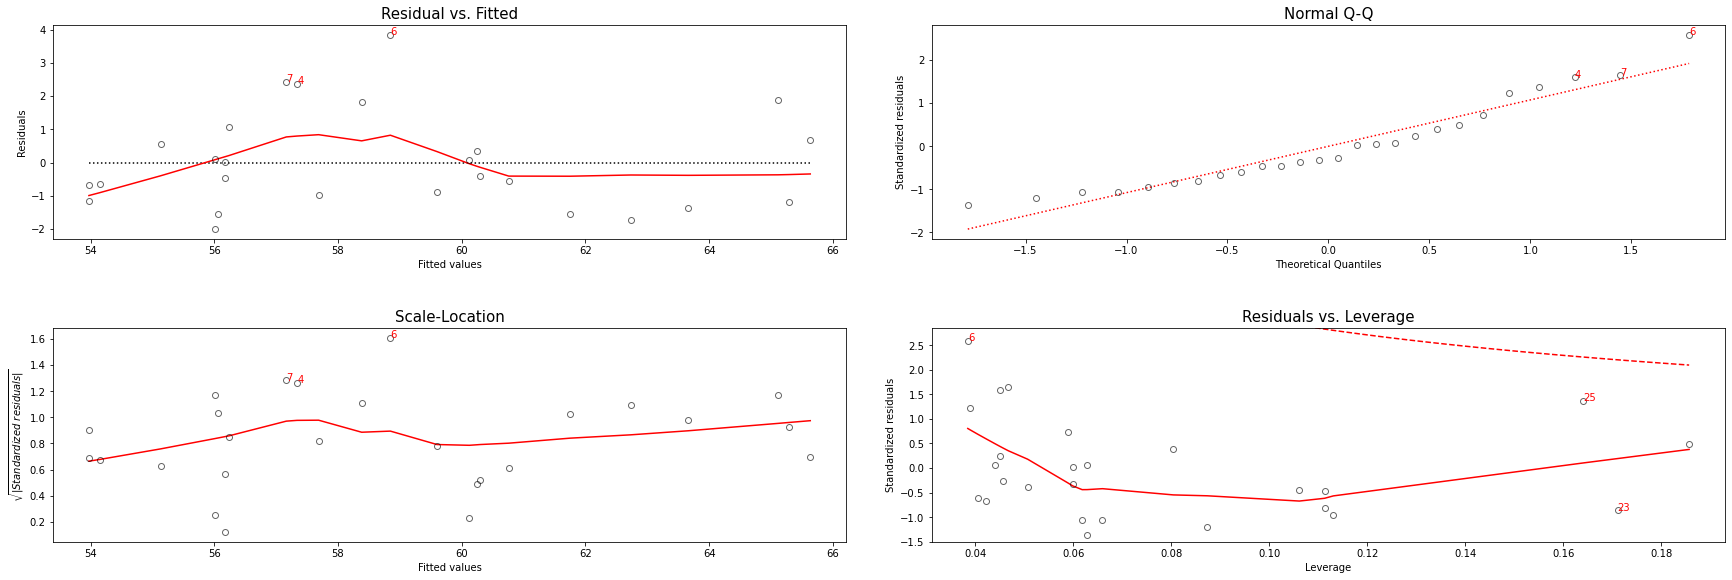

In [143]:
import lmdiag
plt.figure(figsize=(24,8))
lmdiag.plot(modelols)

### In Residual vs fitted plot variance is constant around fitted line, Homoscedasticity if there was a funel shape it's Heteroscedasticity
### Residue are not perfetly normally distributed in Q-Q plot and we can suspect it because of some deviation here, that is caused by some outliers

---
---

### Hence via f-test, t-test, R-squared, Adj_R-Squared,VIF, Residue vs Fitted and Q-Q plot ( Normality of a residue ) we can check whether our model is performing well or not

---
---

## `Gradient descent with one variable ( only theta0 and theta1 )`
### For Mathematics behind it [Click Here](http://localhost:8888/files/Innomatics%20Research%20labs/My_Notebooks/Gradient%20descent%20maths.pdf)

In [144]:
dataset = [[2,4],[3,6],[4,8],[5,10]]
x = [k[0] for k in dataset]
y = [k[1] for k in dataset]

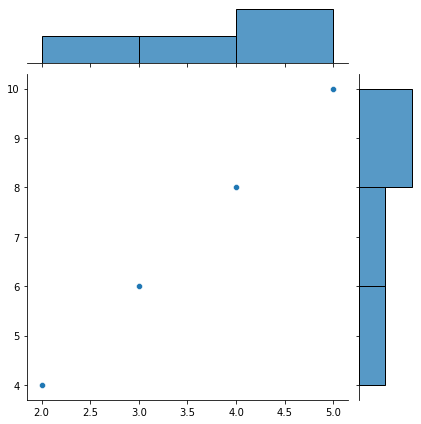

In [145]:
sns.jointplot(x,y)

### random intialization 

In [146]:
o0 , o1 = 0.0,0.5

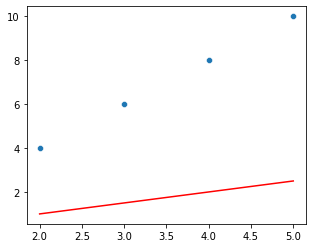

new value of o0 0.0525
new value of o1 0.7025


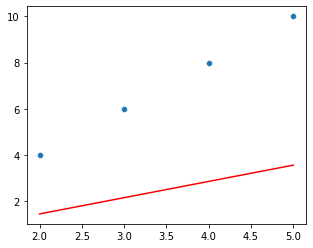

new value of o0 0.09738749999999999
new value of o1 0.8758250000000001


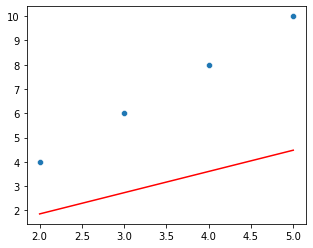

new value of o0 0.13575974999999998
new value of o1 1.0241800625000002


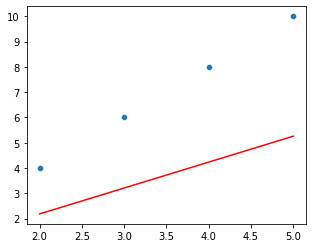

new value of o0 0.16855585031249998
new value of o1 1.1511641628125002


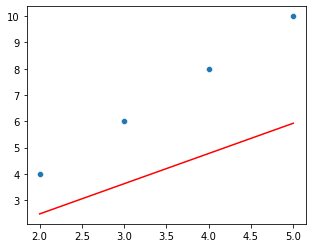

new value of o0 0.19657954611093748
new value of o1 1.2598575460718753


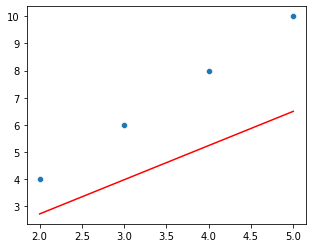

new value of o0 0.22051873653731247
new value of o1 1.3528964932382892


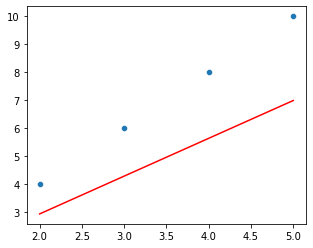

new value of o0 0.24096217190859923
new value of o1 1.4325373108723143


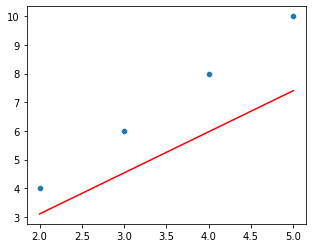

new value of o0 0.25841374430898223
new value of o1 1.500711097887751


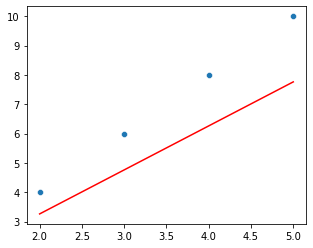

new value of o0 0.2733047184398211
new value of o1 1.5590706186220902


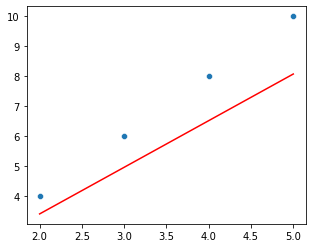

new value of o0 0.28600419960364976
new value of o1 1.6090304199627143


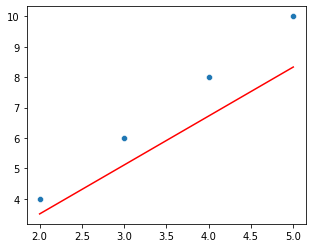

new value of o0 0.29682809290891826
new value of o1 1.65180116628162


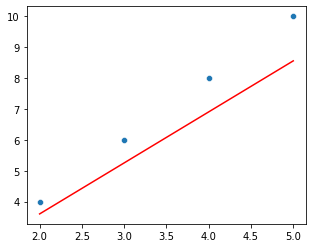

new value of o0 0.30604677115997236
new value of o1 1.6884190255817892


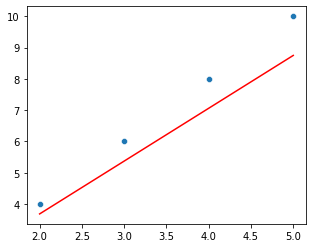

new value of o0 0.31389163755301003
new value of o1 1.7197708201376487


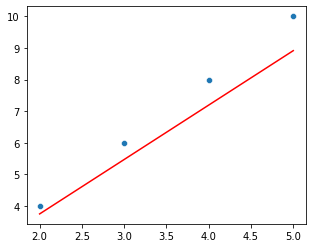

new value of o0 0.32056074247266225
new value of o1 1.7466155521047109


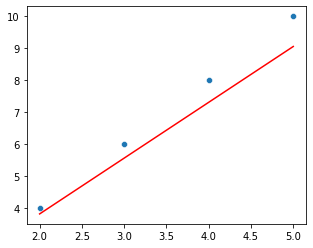

new value of o0 0.32622359072427076
new value of o1 1.7696028265840318


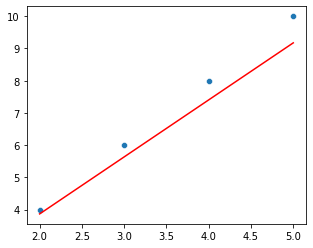

new value of o0 0.33102525588658693
new value of o1 1.789288619319838


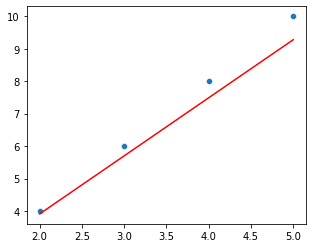

new value of o0 0.33508990165152674
new value of o1 1.8061487717556295


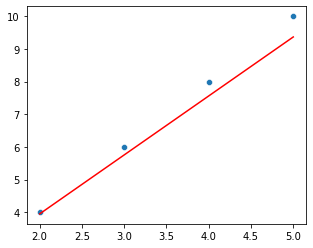

new value of o0 0.33852379562356444
new value of o1 1.820590541010816


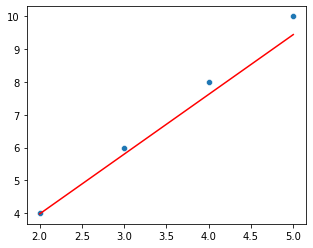

new value of o0 0.3414178887319502
new value of o1 1.8329624851275312


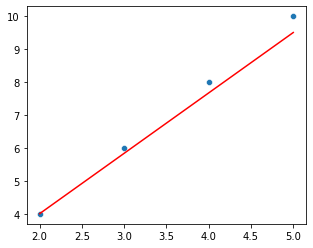

new value of o0 0.34385002286516714
new value of o1 1.8435629235296962


In [147]:
# import time
n_iteration  = 20                      # total iteration
alpha = 0.01                           # learning rate


for iteration in range(n_iteration):
    cost_o0, cost_o1 = 0,0              # cost function
    
    
    y_pred_plot = []
    for i in range(len(x)):
        y_pred = o0 + (o1*x[i])               # using old theta0 and theta1 to predict
        cost_o0 += y_pred - y[i]              # cost function for theta0
        cost_o1 += (y_pred - y[i]) * x[i]     # cost function for theta1
        y_pred_plot.append(y_pred)
    
    ##################### plotting every line
    
    plt.figure(figsize=(5,4))
    sns.scatterplot(x,y)
    sns.lineplot(x=x,y=y_pred_plot,color="red")
    plt.show()
    
    o0 = o0 - ((alpha * cost_o0) /len(x))  # updating theta0 for next iteration
    o1 = o1 - ((alpha * cost_o1) /len(x))  # updating theta1 for next iteration
    print(f"new value of o0 {o0}")
    print(f"new value of o1 {o1}")
#     time.sleep(2)

## `Generalised GD ( as many theta, In terms of matrix)`

---------------------------------------

In [148]:
dataset = [[2,4],[3,6],[4,8],[5,10]]
x = np.array([ [1, k[0]] for k in dataset])
y = np.array([k[1] for k in dataset])

### This function is made only to trace cost history

In [149]:
def cal_cost(theta,X,y):
    m= len(y)
    prediction = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(prediction-y))
    return cost

In [164]:
def gradient_descent(X,y,theta,alpha=0.01,n_iter=20):
    
    m = len(y)
    cost_history = np.zeros(n_iter)
    theta_history = np.zeros((n_iter,len(theta)))
    
    for it in range(n_iter):
        prediction = X.dot(theta)   # similar to theta transpose * X
        theta = theta - (1/m)*alpha*(X.T.dot(prediction - y))     # cost function
        
 #############################  Only to trace theta and cost history


        theta_history[it,:]= theta.T             # only to trace theta history
        cost_history[it] = cal_cost(theta,X,y)   # only to trace cost history
    
    return theta,cost_history,theta_history

In [167]:
theta,cost_history,theta_history = gradient_descent(x,y,[0,0.4],alpha=0.01,n_iter=20)

In [168]:
theta

array([0.36677336, 1.83313379])

In [169]:
cost_history   # error or j theta 

array([12.659632  ,  9.2751687 ,  6.79601644,  4.98001244,  3.64977035,
        2.67535314,  1.96158076,  1.43873301,  1.05573923,  0.77518972,
        0.56968153,  0.41914178,  0.3088669 ,  0.22808639,  0.16891077,
        0.12556092,  0.09380361,  0.07053792,  0.05349244,  0.04100331])

In [170]:
theta_history    # how theta evolved

array([[0.056     , 0.616     ],
       [0.10388   , 0.80088   ],
       [0.1448104 , 0.9591254 ],
       [0.17979291, 1.09457511],
       [0.20968485, 1.21051472],
       [0.23521999, 1.30975626],
       [0.25702632, 1.39470646],
       [0.27564133, 1.46742517],
       [0.29152503, 1.52967533],
       [0.30507115, 1.58296578],
       [0.31661663, 1.62858791],
       [0.32644989, 1.66764696],
       [0.33481775, 1.70108887],
       [0.34193146, 1.72972326],
       [0.34797183, 1.75424302],
       [0.35309361, 1.77524119],
       [0.35742923, 1.79322536],
       [0.36109205, 1.80862991],
       [0.36417908, 1.82182665],
       [0.36677336, 1.83313379]])

### prediction

In [158]:
y_pred_plot = x.dot(theta)

In [159]:
y_pred_plot

array([4.03304093, 5.86617471, 7.6993085 , 9.53244228])

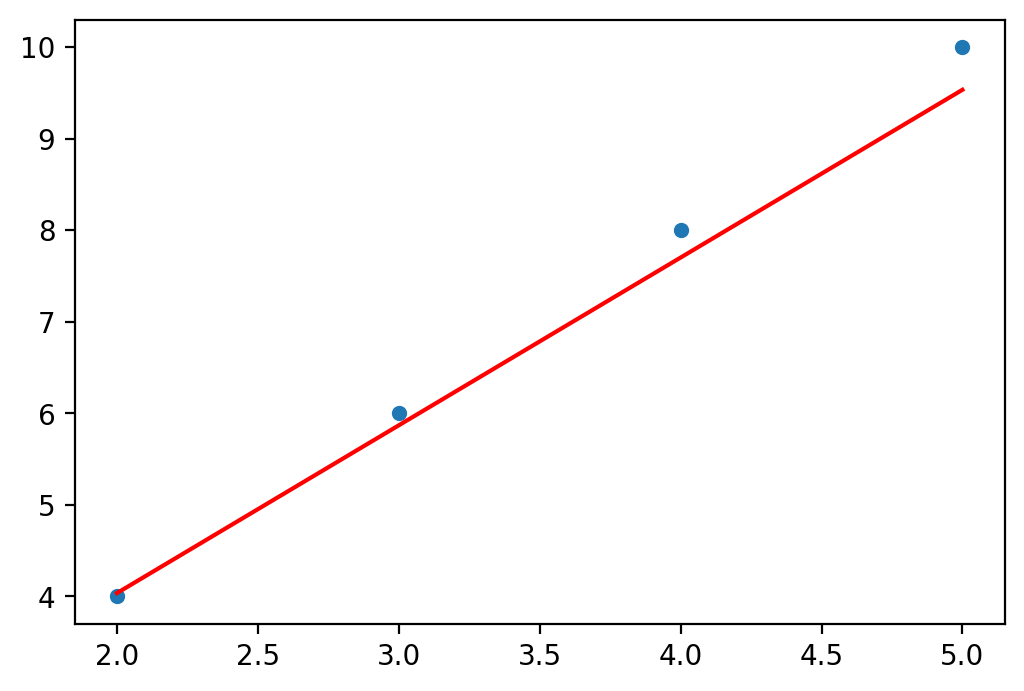

In [173]:
plt.figure(dpi=200)
sns.scatterplot(x[:,1],y)
sns.lineplot(x=x[:,1],y=y_pred_plot,color="red")
plt.show()

### `Made simple by removing extra stuff`

In [178]:
def gradient_descent(X,y,theta,alpha=0.01,n_iter=20):
    
    m = len(y)
 
    for it in range(n_iter):
        prediction = X.dot(theta)   # similar to theta transpose * X
        theta = theta - (1/m)*alpha*(X.T.dot(prediction - y))   # cost function
        
    return theta

In [180]:
theta = gradient_descent(x,y,[0,0.4],alpha=0.01,n_iter=20)
theta

array([0.36677336, 1.83313379])

## `Linear Regression with Scikit-learn`

**The 5 basic steps to implement linear regression**:

+ Import the packages and classes you need.
+ Provide data to work with and eventually do appropriate transformation.
+ Create a regression model and fit it with existing data.
+ Check the results of model fitting to know whether the model is satisfactory.
+ Apply the model on predictions

In [181]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [182]:
x = [[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x,y = np.array(x), np.array(y)

In [183]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [184]:
model.coef_

array([0.44706965, 0.25502548])

In [185]:
model.intercept_

5.52257927519819

In [186]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 5.52257927519819
Slope: [0.44706965 0.25502548]


In [187]:
y_pred = model.predict(x)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

# `END -----------------------`